# Biophysics Lab - 2/8/2019

## Author: Stephanie M. Yan

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

## Implement a simulation of Wright-Fisher allele frequencies for an arbitrary number of generations.

### i. For a starting allele frequency of 0.5, and a population size of 100, produce a histogram with density showing time to fixation over (at least) 1000 trials.

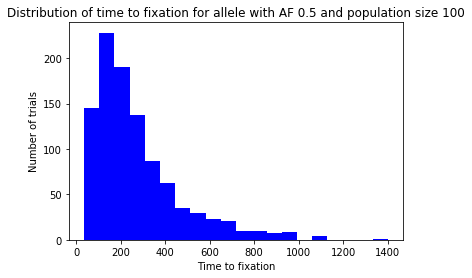

In [58]:
def wright_fisher(AF, pop_size, trials):
    
    gens_to_fix = []
    
    for i in range(trials):
        
        fixed = False
        n = 2*pop_size
        p = AF
        new_num_alleles = np.random.binomial(n, p)
        gens = 1
        
        while fixed == False:
            if (new_num_alleles == n) or (new_num_alleles == 0):
                gens_to_fix.append(gens)
                fixed = True
                break
            else:
                n = 2*pop_size
                p = new_num_alleles/n
                new_num_alleles = np.random.binomial(n, p)
                gens += 1
                
    return(gens_to_fix)
    
gens_trial1 = wright_fisher(0.5,100,1000)

fig, ax = plt.subplots()
ax.hist(gens_trial1, bins=20, color="blue")
ax.set_title("Distribution of time to fixation for allele with AF 0.5 and population size 100")
ax.set_xlabel("Time to fixation")
ax.set_ylabel("Number of trials");

### ii. For a starting allele frequency of 0.5, vary the population size and produce a plot showing fixation time vs. population size.

In [7]:
pop_sizes = np.arange(100,10000000,200000)

gens_dPopsize = []
for i, size in enumerate(pop_sizes):
    if i % 5 == 0:
        print("We're " + str((i*100)/len(pop_sizes)) + "% of the way through! Starting simulation for population size " + str(size))
    gens_to_fix = wright_fisher(0.5,size,1)
    gens_dPopsize.append(gens_to_fix[0])
    
gens_dPopsize

We're 0.0% of the way through! Starting simulation for population size 100
We're 10.0% of the way through! Starting simulation for population size 1000100
We're 20.0% of the way through! Starting simulation for population size 2000100
We're 30.0% of the way through! Starting simulation for population size 3000100
We're 40.0% of the way through! Starting simulation for population size 4000100
We're 50.0% of the way through! Starting simulation for population size 5000100
We're 60.0% of the way through! Starting simulation for population size 6000100
We're 70.0% of the way through! Starting simulation for population size 7000100
We're 80.0% of the way through! Starting simulation for population size 8000100
We're 90.0% of the way through! Starting simulation for population size 9000100


[316,
 285725,
 1119314,
 1588821,
 469276,
 1138223,
 2108281,
 4905733,
 1218377,
 6581500,
 4873019,
 3736168,
 7106600,
 3472824,
 1521625,
 2379138,
 5232571,
 5633893,
 9628016,
 4694918,
 3066646,
 2942091,
 3451979,
 4125253,
 3581701,
 36863438,
 30955378,
 1921299,
 14483147,
 4667593,
 11946990,
 7370230,
 27540958,
 10794835,
 15634359,
 15823086,
 5870948,
 12589417,
 32627522,
 44470078,
 43476998,
 17441843,
 19940877,
 38311776,
 9238240,
 16818998,
 26588718,
 33084154,
 9284884,
 37985372]

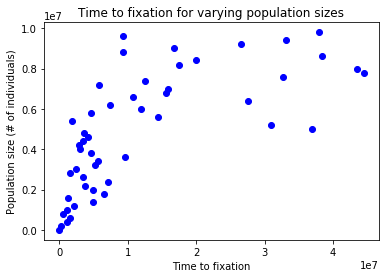

In [11]:
fig, ax = plt.subplots()
ax.scatter(gens_dPopsize, pop_sizes, color="blue")
ax.set_title("Time to fixation for varying population sizes")
ax.set_xlabel("Time to fixation")
ax.set_ylabel("Population size (# of individuals)");

### iii. Simulate the time to fixation under a range of different starting allele frequencies. Produce a plot showing starting allele frequency vs. number of generations to fix.

In [52]:
AFs = np.arange(0,1.1,0.1)
AFs = [round(AF,1) for AF in AFs]

gens_dAF = []
for AF in AFs:
    print("We're " + str(AF*100) + "% of the way through! Starting simulation for allele frequency " + str(AF))
    gens_to_fix = wright_fisher(AF,100,100)
    gens_dAF.append(gens_to_fix)

We're 0.0% of the way through! Starting simulation for allele frequency 0.0
We're 10.0% of the way through! Starting simulation for allele frequency 0.1
We're 20.0% of the way through! Starting simulation for allele frequency 0.2
We're 30.0% of the way through! Starting simulation for allele frequency 0.3
We're 40.0% of the way through! Starting simulation for allele frequency 0.4
We're 50.0% of the way through! Starting simulation for allele frequency 0.5
We're 60.0% of the way through! Starting simulation for allele frequency 0.6
We're 70.0% of the way through! Starting simulation for allele frequency 0.7
We're 80.0% of the way through! Starting simulation for allele frequency 0.8
We're 90.0% of the way through! Starting simulation for allele frequency 0.9
We're 100.0% of the way through! Starting simulation for allele frequency 1.0


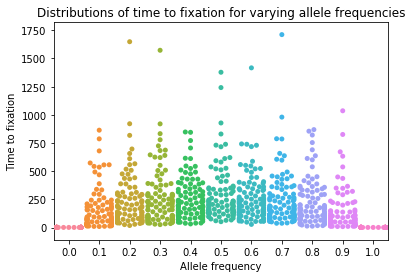

In [53]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame({ "idx" : np.arange(0,100,1) })

for AF, gens_to_fix in zip(AFs, gens_dAF):
    new_col = pd.DataFrame({ str(AF) : gens_to_fix })
    df = pd.concat([df, new_col], axis=1)
    
df.set_index("idx", inplace=True)

fig, ax = plt.subplots()
ax = sns.swarmplot(data=df)
ax.set_title("Distributions of time to fixation for varying allele frequencies")
ax.set_xlabel("Allele frequency")
ax.set_ylabel("Time to fixation");

### iv. Introduce selection and produce a plot of selection coefficient vs. time to fixation for a fixed population size of your choice.

In [63]:
def wright_fisher_s(AF, pop_size, trials, s_coeff):
    
    gens_to_fix = []
    
    for i in range(trials):
        
        fixed = False
        n = 2*pop_size
        i_val = AF*n
        p = (i_val*(1+s_coeff))/(n - i_val + i_val*(1+s_coeff))
        new_num_alleles = np.random.binomial(n, p)
        gens = 1
        
        while fixed == False:
            if (new_num_alleles == n) or (new_num_alleles == 0):
                gens_to_fix.append(gens)
                fixed = True
                break
            else:
                n = 2*pop_size
                i_val = new_num_alleles
                p = (i_val*(1+s_coeff))/(n - i_val + i_val*(1+s_coeff))
                new_num_alleles = np.random.binomial(n, p)
                gens += 1
                
    return(gens_to_fix)

s_coeffs = np.arange(-1,1.1,0.1)

gens_selec = []
for s_coeff in s_coeffs:
    gens_to_fix = wright_fisher_s(0.5,100,1,s_coeff)
    gens_selec.append(gens_to_fix[0])
    
gens_selec

[1, 4, 4, 5, 8, 10, 10, 21, 30, 55, 223, 33, 28, 25, 10, 15, 9, 7, 19, 11, 7]

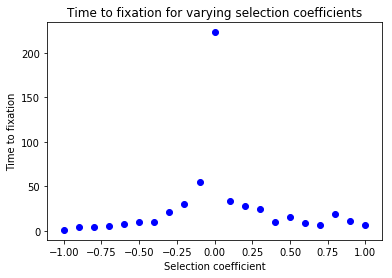

In [64]:
fig, ax = plt.subplots()
ax.scatter(s_coeffs, gens_selec, color="blue")
ax.set_title("Time to fixation for varying selection coefficients")
ax.set_xlabel("Selection coefficient")
ax.set_ylabel("Time to fixation");